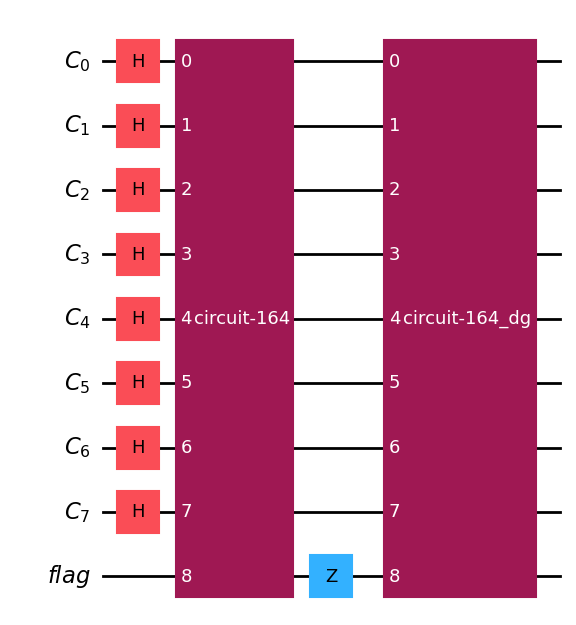

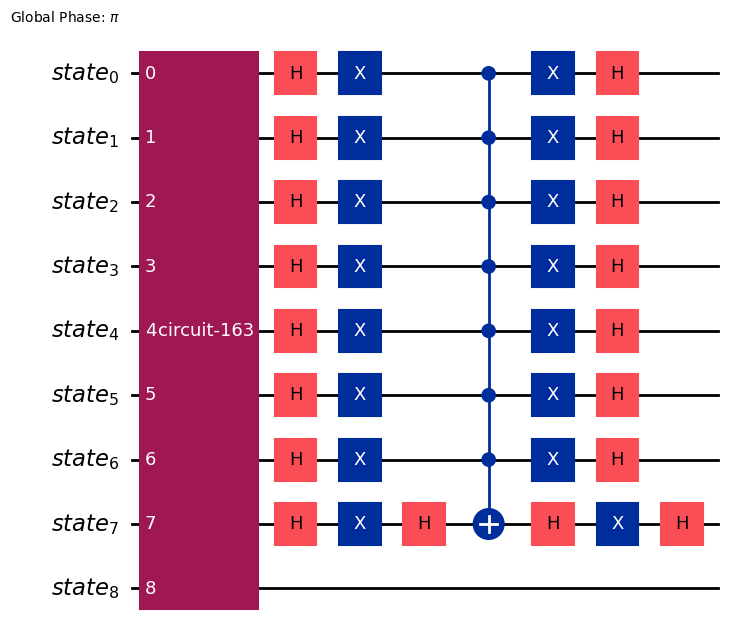

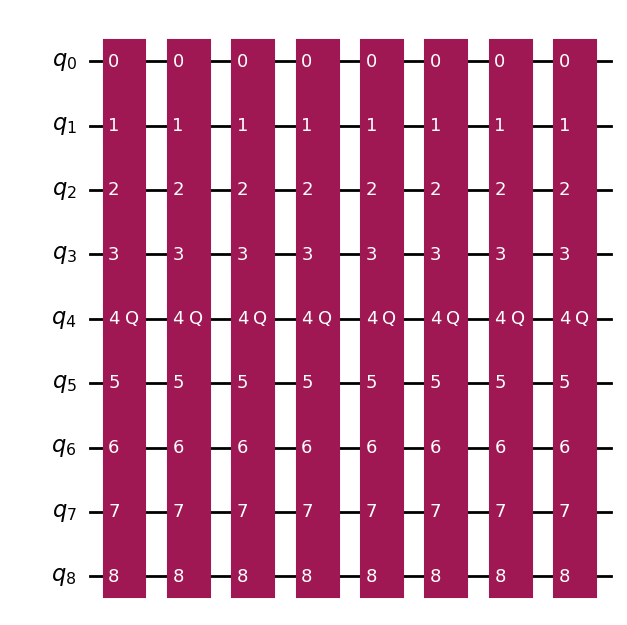

00000000|0.5711698583502727
01110010|0.059654250292888435
00011110|0.05965425029288835
00111001|0.05965425029288838
10001101|0.05965425029288839
10010011|0.059654250292888435
01001011|0.05965425029288841


In [1]:
import warnings
warnings.filterwarnings("ignore")

from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import Aer
from hcd_encoding_grovers_search import create_hcd_oracle
from qiskit.circuit.library import GroverOperator
import numpy as np

# --- Quantum Registers ---
flag = QuantumRegister(1, 'flag')          # Marking solutions which are under the threshold
cycle = QuantumRegister(8, 'C')            # Cycle qubits

oracle = QuantumCircuit(cycle, flag)
hcd = create_hcd_oracle()
oracle.append(hcd,[*cycle, *flag])
display(oracle.decompose().draw("mpl"))

reflection_qubits = list(range(0,8))
grover_op = GroverOperator(oracle, reflection_qubits= reflection_qubits)
display(grover_op.decompose().draw(output="mpl", style="iqp"))
qc = QuantumCircuit(grover_op.num_qubits)
qc.compose(grover_op.power(8), inplace=True)
display(qc.decompose().draw(output="mpl", style="iqp"))

backend = Aer.get_backend('statevector_simulator')
compiled = transpile(qc, backend)
result = backend.run(compiled).result()
state = result.get_statevector()

for i,amp in enumerate(state):
    bin_str = format(i, f'0{9}b')
    if abs(amp) ** 2 > .014:
        print(f"{bin_str[1:9][::-1]}|{abs(amp)**2}")



# # Simulate the statevector
# backend = Aer.get_backend('statevector_simulator')
# compiled = transpile(oracle, backend)
# result = backend.run(compiled).result()
# state = result.get_statevector()

# print("Output from HCD Encoding Test||")
# print("cycle|hamiltonian_flag")
# # Print basis states where ancilla (q9) is |1⟩
# for i, amp in enumerate(state):
#     if not np.isclose(abs(amp), 0):
#         bin_state = format(i, f'0{oracle.num_qubits}b')  # 9-bit string
#         phase = np.angle(amp)
#         eps = 1e-10
#         if abs(phase) < eps:
#             phase = 0
#         print(f"{bin_state[1:9]}| {bin_state[0]}| {phase}")
